In [1]:
import numpy as np  
import pandas as pd  
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 

/kaggle/input/fe-course-data/spotify.csv
/kaggle/input/fe-course-data/ames.csv
/kaggle/input/fe-course-data/DataDocumentation.txt
/kaggle/input/fe-course-data/movielens1m.csv
/kaggle/input/fe-course-data/abalone.csv
/kaggle/input/fe-course-data/concrete.csv
/kaggle/input/fe-course-data/autos.csv
/kaggle/input/fe-course-data/accidents.csv
/kaggle/input/fe-course-data/customer.csv
/kaggle/input/fe-course-data/caravan.csv
/kaggle/input/fe-course-data/airbnb.csv
/kaggle/input/fe-course-data/bike-sharing.csv
/kaggle/input/fe-course-data/housing.csv


* Feature Utility Metric : Function Measuring associations between a feature and a target ( could use correlation )
* Mutual information measures relationships between two quantities, but it can detect any relationship not just linear ones
* Mutual information between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. if you knew the value of a feature, how much more confident would you be about your target

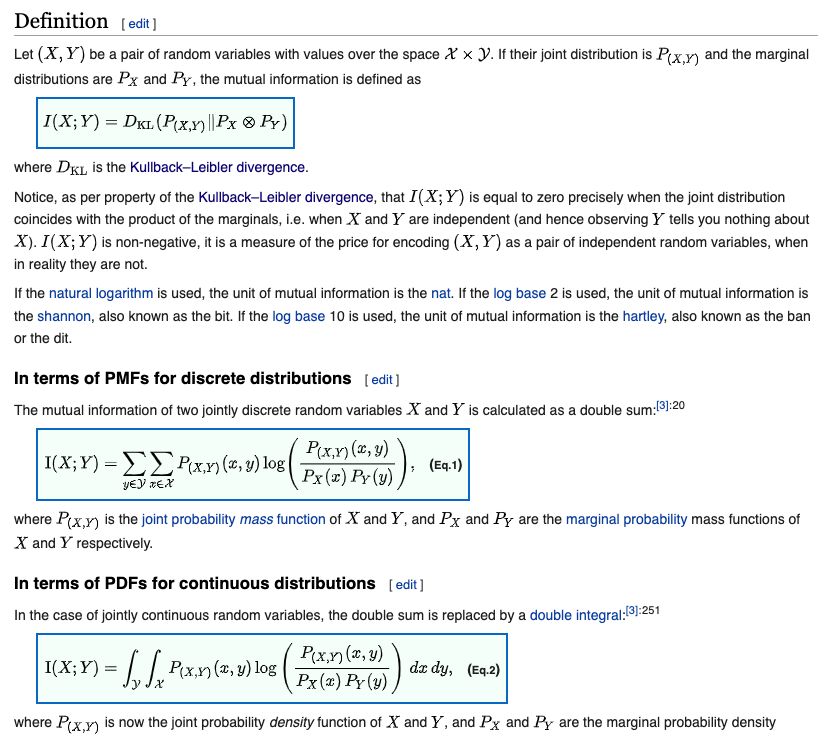
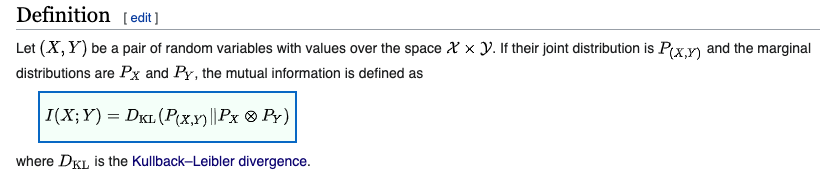

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("../input/fe-course-data/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [4]:
X = df.copy()
y = X.pop("price")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [5]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X , y , discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores , name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

mi_scores = make_mi_scores(X , y, discrete_features)
mi_scores[::3]

curb_weight          1.477158
highway_mpg          0.958906
length               0.609375
bore                 0.509928
stroke               0.386719
num_of_cylinders     0.330589
compression_ratio    0.133338
fuel_type            0.048120
Name: MI Scores, dtype: float64

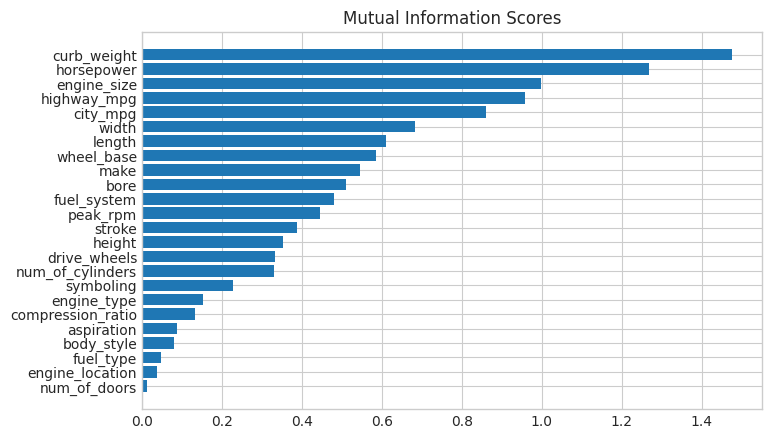

In [6]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True )
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi = 100 , figsize = (8, 5))
plot_mi_scores(mi_scores)

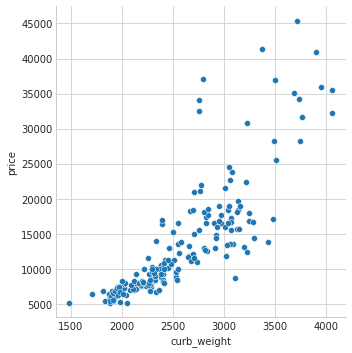

In [7]:
sns.relplot(x = "curb_weight", y = "price", data = df)

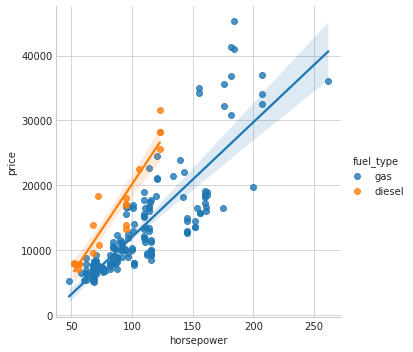

In [8]:
sns.lmplot(x = "horsepower", y = "price", hue = "fuel_type", data = df)